<a href="https://colab.research.google.com/github/robertosgpontes/osem/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Formulação Geral do Problema

O problema apresentado pode ser formulado através de uma

\begin{equation}
	\max  \sum_{i=1}^{n}{[A_{i}^1-(A_{i}^2-A_{i}^3)]X_i} = \max \sum_{i=1}^{n}{C_{i}^1X_i}
\end{equation}
e
\begin{equation}
\min \sum_{i=1}^{n}{C_{i}^2X_i}
\end{equation}


Sujeito a
\begin{equation}
x_1 \leq b_1
\end{equation}
\begin{equation}
x_2 \leq b_2
\end{equation}
\begin{equation}
x_3 \leq b_3
\end{equation}
\begin{equation}
x_1 + x_3 \leq b_4
\end{equation}
\begin{equation}
x_1 + x_2 + x_3 + x_4 = b_5
\end{equation}
\begin{equation}
x_1 \geq b_6
\end{equation}
\begin{equation}
x_2 \geq b_7
\end{equation}
\begin{equation}
x_1, x_2, x_3, x_4 \geq 0
\end{equation}


# Methodology

https://www.supplychaindataanalytics.com/multi-objective-linear-optimization-with-pulp-in-python/

https://pythonhealthcare.org/tag/pareto-front/



### Approach 1: Solution with Hierarchical Methodology

Maximizing for one objective, then adding it as a constraint and solving for the other objective

#### 1.1. First Step

\begin{equation}
S_1 = \max \sum_{i=1}^{n}{C_{i}^1X_i}
\end{equation}

Sujeito a
\begin{equation}
x_1 \leq b_1
\end{equation}
\begin{equation}
x_2 \leq b_2
\end{equation}
\begin{equation}
x_3 \leq b_3
\end{equation}
\begin{equation}
x_1 + x_3 \leq b_4
\end{equation}
\begin{equation}
x_1 + x_2 + x_3 + x_4 = b_5
\end{equation}
\begin{equation}
x_1 \geq b_6
\end{equation}
\begin{equation}
x_2 \geq b_7
\end{equation}
\begin{equation}
x_1, x_2, x_3, x_4 \geq 0
\end{equation}

#### 1.2. Second Step


\begin{equation}
\min \sum_{i=1}^{n}{C_{i}^2X_i}
\end{equation}
Sujeito a
\begin{equation}
x_1 \leq b_1
\end{equation}
\begin{equation}
x_2 \leq b_2
\end{equation}
\begin{equation}
x_3 \leq b_3
\end{equation}
\begin{equation}
x_1 + x_3 \leq b_4
\end{equation}
\begin{equation}
x_1 + x_2 + x_3 + x_4 = b_5
\end{equation}
\begin{equation}
x_1 \geq b_6
\end{equation}
\begin{equation}
x_2 \geq b_7
\end{equation}
\begin{equation}
\max \sum_{i=1}^{n}{C_{i}^1X_i} \geq S_1
\end{equation}
\begin{equation}
x_1, x_2, x_3, x_4 \geq 0
\end{equation}


## Approach 2: Solution with ...

\begin{equation}
	\max  \alpha\sum_{i=1}^{n}{C_{i}^1X_i} - (1-\alpha)\sum_{i=1}^{n}{C_{i}^2X_i}
\end{equation}

Sujeito a
\begin{equation}
x_1 \leq b_1
\end{equation}
\begin{equation}
x_2 \leq b_2
\end{equation}
\begin{equation}
x_3 \leq b_3
\end{equation}
\begin{equation}
x_1 + x_3 \leq b_4
\end{equation}
\begin{equation}
x_1 + x_2 + x_3 + x_4 = b_5
\end{equation}
\begin{equation}
x_1 \geq b_6
\end{equation}
\begin{equation}
x_2 \geq b_7
\end{equation}
\begin{equation}
x_1, x_2, x_3, x_4 \geq 0
\end{equation}

# General Definitions

## Language

In [1]:
% pip install pulp
!rm /content/utils.py
!wget https://raw.githubusercontent.com/robertosgpontes/osem/main/utils.py
%run /content/utils.py

--2021-08-23 18:13:56--  https://raw.githubusercontent.com/robertosgpontes/osem/main/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3210 (3.1K) [text/plain]
Saving to: ‘utils.py’

utils.py            100%[===================>]   3.13K  --.-KB/s    in 0s      

2021-08-23 18:13:56 (41.3 MB/s) - ‘utils.py’ saved [3210/3210]



In [2]:
# Python libraries used to solve the problem Linear Programing
import pulp
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Problem Solution

In [3]:
NUM_ITER = 1000

In [4]:
DataStandardization = Standardization

### Alpha Variations

In [5]:
alpha_lin = np.linspace(0, 1, NUM_ITER)

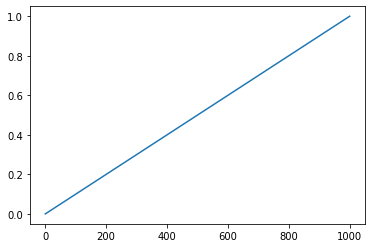

In [6]:
plt.plot(np.linspace(0, NUM_ITER, NUM_ITER), alpha_lin)

In [7]:
alpha_sig_004 = sig(-0.004, NUM_ITER)

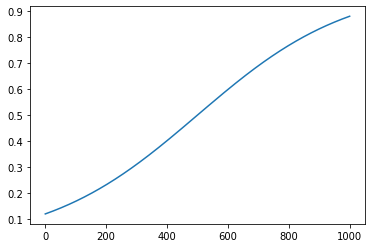

In [8]:
plt.plot(np.linspace(0, NUM_ITER, NUM_ITER), alpha_sig_004)

In [9]:
alpha_sig_06 = sig(-0.06, NUM_ITER)

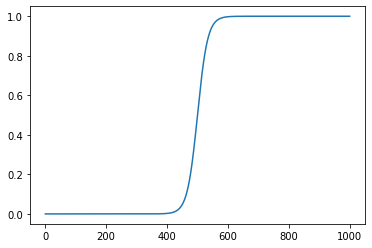

In [10]:
plt.plot(np.linspace(0, NUM_ITER, NUM_ITER), alpha_sig_06)

# Solution

##Paper 1 (P1): Optimizing the Management of Soil Erosion

Nikkami, Davood & Elektorowicz, Maria & MEHUYS, GUY. (2002). Optimizing the Management of Soil Erosion. Water Quality Research Journal in Canada. 37. 10.2166/wqrj.2002.038. 

### Model Parameter

In [11]:
# Variáveis do modelo

Cini = np.array([[10.54394,  0.0469 ,  0.59679,  0.02194],
              [1.41, 4.99, 2.41, 6.24]])

A = np.array([  [1, 0, 0, 0],
                [0, 0, 1, 0],
                [0, 0, 0, 1],
                [1, 0, 1, 0],
                [1, 1, 1, 1],
                [1, 0, 0, 0],
                [0, 1, 0, 0]])

b = np.array([[557],[1143],[1577],[1700],[10310],[160],[6990]])

### Solution


#### Approach 1

In [12]:
C = Cini

##### Step 1

In [13]:
linearProblem = pulp.LpProblem("First_Objective_Max",pulp.LpMaximize)

X = create_x_variables()

linearProblem += f(C[0], X)

linearProblem = load_model(linearProblem, A, X, b)

solution = linearProblem.solve()

In [14]:
print_solution(solution, linearProblem, X)


Status = Optimal
Value = 6958.9145499999995
x1 = 557.0
x2 = 8610.0
x3 = 1143.0
x4 = 0.0


In [15]:
f1_max = pulp.value(linearProblem.objective)

##### Step 2

In [16]:
linearProblem = pulp.LpProblem("Second_Objective_Min",pulp.LpMinimize)

X = create_x_variables()

linearProblem += f(C[1], X)

linearProblem = load_model(linearProblem, A, X, b)

linearProblem += f(C[0], X) >= f1_max

solution = linearProblem.solve()

In [17]:
print_solution(solution, linearProblem, X)


Status = Optimal
Value = 46503.9
x1 = 557.0
x2 = 8610.0
x3 = 1143.0
x4 = 0.0


#### Approach 2

In [18]:
C = DataStandardization(Cini)

In [19]:
display(C)

array([[ 2.08568285, -0.92932991, -0.77138773, -0.93649905],
       [-0.53781345,  0.4904522 , -0.25058841,  0.8494835 ]])

In [20]:
df_solution_lin = run_models(alpha_lin, C, A, b)

In [21]:
df_solution_lin

,iter,alpha,status,x1,x2,x3,x4,obj_value,f1,f2
0,0,0.000000,Optimal,557.0,8610.0,1143.0,0.0,-3636.808787,-7721.50136,-3636.808787
1,1,0.001001,Optimal,557.0,8610.0,1143.0,0.0,-3640.897569,-7721.50136,-3636.808787
2,2,0.002002,Optimal,557.0,8610.0,1143.0,0.0,-3644.986350,-7721.50136,-3636.808787
3,3,0.003003,Optimal,557.0,8610.0,1143.0,0.0,-3649.075131,-7721.50136,-3636.808787
4,4,0.004004,Optimal,557.0,8610.0,1143.0,0.0,-3653.163913,-7721.50136,-3636.808787
...,...,...,...,...,...,...,...,...,...,...
995,995,0.995996,Optimal,557.0,8610.0,1143.0,0.0,-7705.146235,-7721.50136,-3636.808787
996,996,0.996997,Optimal,557.0,8610.0,1143.0,0.0,-7709.235016,-7721.50136,-3636.808787
997,997,0.997998,Optimal,557.0,8610.0,1143.0,0.0,-7713.323798,-7721.50136,-3636.808787
998,998,0.998999,Optimal,557.0,8610.0,1143.0,0.0,-7717.412579,-7721.50136,-3636.808787


In [22]:
df_solution_sig_004 = run_models(alpha_sig_004, C, A, b)

In [23]:
df_solution_sig_004

,iter,alpha,status,x1,x2,x3,x4,obj_value,f1,f2
0,0,0.119203,Optimal,557.0,8610.0,1143.0,0.0,-4123.716078,-7721.50136,-3636.808787
1,1,0.119624,Optimal,557.0,8610.0,1143.0,0.0,-4125.435881,-7721.50136,-3636.808787
2,2,0.120046,Optimal,557.0,8610.0,1143.0,0.0,-4127.160930,-7721.50136,-3636.808787
3,3,0.120470,Optimal,557.0,8610.0,1143.0,0.0,-4128.891237,-7721.50136,-3636.808787
4,4,0.120895,Optimal,557.0,8610.0,1143.0,0.0,-4130.626810,-7721.50136,-3636.808787
...,...,...,...,...,...,...,...,...,...,...
995,995,0.879105,Optimal,557.0,8610.0,1143.0,0.0,-7227.683337,-7721.50136,-3636.808787
996,996,0.879530,Optimal,557.0,8610.0,1143.0,0.0,-7229.418911,-7721.50136,-3636.808787
997,997,0.879954,Optimal,557.0,8610.0,1143.0,0.0,-7231.149217,-7721.50136,-3636.808787
998,998,0.880376,Optimal,557.0,8610.0,1143.0,0.0,-7232.874267,-7721.50136,-3636.808787


In [24]:
df_solution_sig_06 = run_models(alpha_sig_06, C, A, b)

In [25]:
df_solution_sig_06

,iter,alpha,status,x1,x2,x3,x4,obj_value,f1,f2
0,0,9.357623e-14,Optimal,557.0,8610.0,1143.0,0.0,-3636.808787,-7721.50136,-3636.808787
1,1,9.936863e-14,Optimal,557.0,8610.0,1143.0,0.0,-3636.808787,-7721.50136,-3636.808787
2,2,1.055196e-13,Optimal,557.0,8610.0,1143.0,0.0,-3636.808787,-7721.50136,-3636.808787
3,3,1.120513e-13,Optimal,557.0,8610.0,1143.0,0.0,-3636.808787,-7721.50136,-3636.808787
4,4,1.189873e-13,Optimal,557.0,8610.0,1143.0,0.0,-3636.808787,-7721.50136,-3636.808787
...,...,...,...,...,...,...,...,...,...,...
995,995,1.000000e+00,Optimal,557.0,8610.0,1143.0,0.0,-7721.501360,-7721.50136,-3636.808787
996,996,1.000000e+00,Optimal,557.0,8610.0,1143.0,0.0,-7721.501360,-7721.50136,-3636.808787
997,997,1.000000e+00,Optimal,557.0,8610.0,1143.0,0.0,-7721.501360,-7721.50136,-3636.808787
998,998,1.000000e+00,Optimal,557.0,8610.0,1143.0,0.0,-7721.501360,-7721.50136,-3636.808787


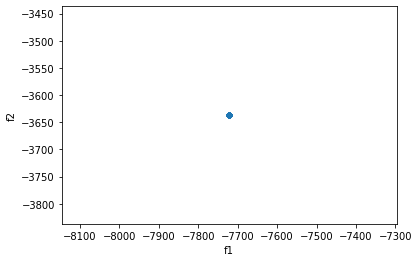

In [26]:
df_solution_sig_06.plot.scatter(x='f1', y='f2')

##Paper 2 (P2): Land Use Scenarios and Optimization in a Watershed.

D. Nikkami, M. Shabani and H. Ahmadi, 2009. Land Use Scenarios and Optimization in a Watershed. Journal of Applied Sciences, 9: 287-295. DOI: 10.3923/jas.2009.287.295

### Model Parameter

In [27]:
# Variáveis do modelo

Cini = np.array([[21.452,  0.101 ,  4.56,  1.013],
              [8.77, 10.47, 12.57, 10.81]])

A = np.array([  [1, 0, 0, 0],
                [0, 0, 1, 0],
                [0, 0, 0, 1],
                [1, 0, 1, 0],
                [1, 1, 1, 1],
                [1, 0, 0, 0],
                [0, 1, 0, 0]])

b = np.array([[2115],[237],[207],[2352],[13032],[561],[10550]])

### Solution


#### Approach 1

In [28]:
C = Cini

##### Step 1

In [29]:
linearProblem = pulp.LpProblem("First_Objective_Max",pulp.LpMaximize)

X = create_x_variables()

linearProblem += f(C[0], X)

linearProblem = load_model(linearProblem, A, X, b)

solution = linearProblem.solve()

In [30]:
print_solution(solution, linearProblem, X)


Status = Optimal
Value = 47648.94000000001
x1 = 2115.0
x2 = 10550.0
x3 = 237.0
x4 = 130.0


In [31]:
f1_max = pulp.value(linearProblem.objective)

##### Step 2

In [32]:
linearProblem = pulp.LpProblem("Second_Objective_Min",pulp.LpMinimize)

X = create_x_variables()

linearProblem += f(C[1], X)

linearProblem = load_model(linearProblem, A, X, b)

linearProblem += f(C[0], X) >= f1_max

solution = linearProblem.solve()

In [33]:
print_solution(solution, linearProblem, X)


Status = Optimal
Value = 133391.44
x1 = 2115.0
x2 = 10550.0
x3 = 237.0
x4 = 130.0


#### Approach 2

In [34]:
C = DataStandardization(Cini)

In [35]:
display(C)

array([[ 1.96676355, -1.33095853, -0.64225342, -1.19009756],
       [ 0.00799293,  0.27056272,  0.59491364,  0.32307668]])

In [36]:
df_solution_lin = run_models(alpha_lin, C, A, b)

In [37]:
df_solution_lin

,iter,alpha,status,x1,x2,x3,x4,obj_value,f1,f2
0,0,0.000000,Optimal,2115.0,10917.0,0.0,0.0,-2970.638281,-10370.369387,-2970.638281
1,1,0.001001,Optimal,2115.0,10917.0,0.0,0.0,-2978.045419,-10370.369387,-2970.638281
2,2,0.002002,Optimal,2115.0,10917.0,0.0,0.0,-2985.452557,-10370.369387,-2970.638281
3,3,0.003003,Optimal,2115.0,10917.0,0.0,0.0,-2992.859696,-10370.369387,-2970.638281
4,4,0.004004,Optimal,2115.0,10917.0,0.0,0.0,-3000.266834,-10370.369387,-2970.638281
...,...,...,...,...,...,...,...,...,...,...
995,995,0.995996,Optimal,2115.0,10550.0,237.0,130.0,-10160.267791,-10188.834350,-3054.336262
996,996,0.996997,Optimal,2115.0,10550.0,237.0,130.0,-10167.409431,-10188.834350,-3054.336262
997,997,0.997998,Optimal,2115.0,10550.0,237.0,130.0,-10174.551071,-10188.834350,-3054.336262
998,998,0.998999,Optimal,2115.0,10550.0,237.0,130.0,-10181.692710,-10188.834350,-3054.336262


In [38]:
df_solution_sig_004 = run_models(alpha_sig_004, C, A, b)

In [39]:
df_solution_sig_004

,iter,alpha,status,x1,x2,x3,x4,obj_value,f1,f2
0,0,0.119203,Optimal,2115.0,10917.0,0.0,0.0,-3852.707851,-10370.369387,-2970.638281
1,1,0.119624,Optimal,2115.0,10917.0,0.0,0.0,-3855.823405,-10370.369387,-2970.638281
2,2,0.120046,Optimal,2115.0,10917.0,0.0,0.0,-3858.948464,-10370.369387,-2970.638281
3,3,0.120470,Optimal,2115.0,10917.0,0.0,0.0,-3862.083046,-10370.369387,-2970.638281
4,4,0.120895,Optimal,2115.0,10917.0,0.0,0.0,-3865.227169,-10370.369387,-2970.638281
...,...,...,...,...,...,...,...,...,...,...
995,995,0.879105,Optimal,2115.0,10550.0,237.0,130.0,-9326.310751,-10188.834350,-3054.336262
996,996,0.879530,Optimal,2115.0,10550.0,237.0,130.0,-9329.342177,-10188.834350,-3054.336262
997,997,0.879954,Optimal,2115.0,10550.0,237.0,130.0,-9332.364404,-10188.834350,-3054.336262
998,998,0.880376,Optimal,2115.0,10550.0,237.0,130.0,-9335.377449,-10188.834350,-3054.336262


In [40]:
df_solution_sig_06 = run_models(alpha_sig_06, C, A, b)

In [41]:
df_solution_sig_06

,iter,alpha,status,x1,x2,x3,x4,obj_value,f1,f2
0,0,9.357623e-14,Optimal,2115.0,10917.0,0.0,0.0,-2970.638281,-10370.369387,-2970.638281
1,1,9.936863e-14,Optimal,2115.0,10917.0,0.0,0.0,-2970.638281,-10370.369387,-2970.638281
2,2,1.055196e-13,Optimal,2115.0,10917.0,0.0,0.0,-2970.638281,-10370.369387,-2970.638281
3,3,1.120513e-13,Optimal,2115.0,10917.0,0.0,0.0,-2970.638281,-10370.369387,-2970.638281
4,4,1.189873e-13,Optimal,2115.0,10917.0,0.0,0.0,-2970.638281,-10370.369387,-2970.638281
...,...,...,...,...,...,...,...,...,...,...
995,995,1.000000e+00,Optimal,2115.0,10550.0,237.0,130.0,-10188.834350,-10188.834350,-3054.336262
996,996,1.000000e+00,Optimal,2115.0,10550.0,237.0,130.0,-10188.834350,-10188.834350,-3054.336262
997,997,1.000000e+00,Optimal,2115.0,10550.0,237.0,130.0,-10188.834350,-10188.834350,-3054.336262
998,998,1.000000e+00,Optimal,2115.0,10550.0,237.0,130.0,-10188.834350,-10188.834350,-3054.336262


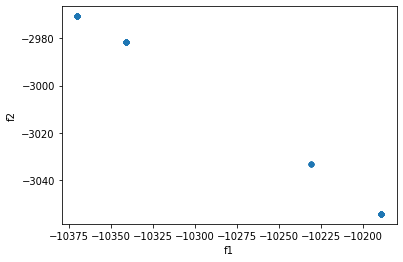

In [42]:
df_solution_lin.plot.scatter(x='f1', y='f2')

##Paper 3 (P3): Land use optimization in watershed scale

Sadeghi, Seyed Hamidreza & Jalili, Khalil & Nikkami, Davood. (2009). Land use optimization in watershed scale. Land Use Policy. 26. 186-193. 10.1016/j.landusepol.2008.02.007. 

### Model Parameter

In [43]:
# Variáveis do modelo

C = np.array([[8.5042,  0.1562 ,  4.8758,  0.3215],
              [7.389, 8.144, 7.389, 21.112]])

A = np.array([  [1, 0, 0, 0],
                [0, 0, 1, 0],
                [0, 0, 0, 1],
                [1, 0, 1, 0],
                [1, 1, 1, 1],
                [1, 0, 0, 0],
                [0, 1, 0, 0]])

b = np.array([[2115],[237],[207],[2352],[13032],[561],[10550]])

### Solution


#### Approach 1

In [44]:
C = Cini

##### Step 1

In [45]:
linearProblem = pulp.LpProblem("First_Objective_Max",pulp.LpMaximize)

X = create_x_variables()

linearProblem += f(C[0], X)

linearProblem = load_model_2(linearProblem, A, X, b)

solution = linearProblem.solve()

In [46]:
print_solution(solution, linearProblem, X)


Status = Optimal
Value = 47648.94000000001
x1 = 2115.0
x2 = 10550.0
x3 = 237.0
x4 = 130.0


In [47]:
f1_max = pulp.value(linearProblem.objective)

##### Step 2

In [48]:
linearProblem = pulp.LpProblem("Second_Objective_Min",pulp.LpMinimize)

X = create_x_variables()

linearProblem += f(C[1], X)

linearProblem = load_model_2(linearProblem, A, X, b)

linearProblem += f(C[0], X) >= f1_max

solution = linearProblem.solve()

In [49]:
print_solution(solution, linearProblem, X)


Status = Optimal
Value = 133391.44
x1 = 2115.0
x2 = 10550.0
x3 = 237.0
x4 = 130.0


#### Approach 2

In [50]:
C = DataStandardization(Cini)

In [51]:
display(C)

array([[ 1.96676355, -1.33095853, -0.64225342, -1.19009756],
       [ 0.00799293,  0.27056272,  0.59491364,  0.32307668]])

In [52]:
df_solution_lin = run_models_2(alpha_lin, C, A, b)

In [53]:
df_solution_lin

,iter,alpha,status,x1,x2,x3,x4,obj_value,f1,f2
0,0,0.000000,Optimal,561.0,10550.0,0.0,0.0,-2858.920744,-12938.258164,-2858.920744
1,1,0.001001,Optimal,561.0,10550.0,0.0,0.0,-2869.010171,-12938.258164,-2858.920744
2,2,0.002002,Optimal,561.0,10550.0,0.0,0.0,-2879.099598,-12938.258164,-2858.920744
3,3,0.003003,Optimal,561.0,10550.0,0.0,0.0,-2889.189024,-12938.258164,-2858.920744
4,4,0.004004,Optimal,561.0,10550.0,0.0,0.0,-2899.278451,-12938.258164,-2858.920744
...,...,...,...,...,...,...,...,...,...,...
995,995,0.995996,Optimal,2115.0,10550.0,0.0,0.0,-9853.837272,-9881.907605,-2871.341762
996,996,0.996997,Optimal,2115.0,10550.0,0.0,0.0,-9860.854855,-9881.907605,-2871.341762
997,997,0.997998,Optimal,2115.0,10550.0,0.0,0.0,-9867.872439,-9881.907605,-2871.341762
998,998,0.998999,Optimal,2115.0,10550.0,0.0,0.0,-9874.890022,-9881.907605,-2871.341762


In [54]:
df_solution_sig_004 = run_models_2(alpha_sig_004, C, A, b)

In [55]:
df_solution_sig_004

,iter,alpha,status,x1,x2,x3,x4,obj_value,f1,f2
0,0,0.119203,Optimal,2115.0,10550.0,0.0,0.0,-3707.021696,-9881.907605,-2871.341762
1,1,0.119624,Optimal,2115.0,10550.0,0.0,0.0,-3709.973397,-9881.907605,-2871.341762
2,2,0.120046,Optimal,2115.0,10550.0,0.0,0.0,-3712.934104,-9881.907605,-2871.341762
3,3,0.120470,Optimal,2115.0,10550.0,0.0,0.0,-3715.903832,-9881.907605,-2871.341762
4,4,0.120895,Optimal,2115.0,10550.0,0.0,0.0,-3718.882600,-9881.907605,-2871.341762
...,...,...,...,...,...,...,...,...,...,...
995,995,0.879105,Optimal,2115.0,10550.0,0.0,0.0,-9034.366768,-9881.907605,-2871.341762
996,996,0.879530,Optimal,2115.0,10550.0,0.0,0.0,-9037.345536,-9881.907605,-2871.341762
997,997,0.879954,Optimal,2115.0,10550.0,0.0,0.0,-9040.315264,-9881.907605,-2871.341762
998,998,0.880376,Optimal,2115.0,10550.0,0.0,0.0,-9043.275970,-9881.907605,-2871.341762


In [56]:
df_solution_sig_06 = run_models_2(alpha_sig_06, C, A, b)

In [57]:
df_solution_sig_06

,iter,alpha,status,x1,x2,x3,x4,obj_value,f1,f2
0,0,9.357623e-14,Optimal,561.0,10550.0,0.0,0.0,-2858.920744,-12938.258164,-2858.920744
1,1,9.936863e-14,Optimal,561.0,10550.0,0.0,0.0,-2858.920744,-12938.258164,-2858.920744
2,2,1.055196e-13,Optimal,561.0,10550.0,0.0,0.0,-2858.920744,-12938.258164,-2858.920744
3,3,1.120513e-13,Optimal,561.0,10550.0,0.0,0.0,-2858.920744,-12938.258164,-2858.920744
4,4,1.189873e-13,Optimal,561.0,10550.0,0.0,0.0,-2858.920744,-12938.258164,-2858.920744
...,...,...,...,...,...,...,...,...,...,...
995,995,1.000000e+00,Optimal,2115.0,10550.0,0.0,0.0,-9881.907605,-9881.907605,-2871.341762
996,996,1.000000e+00,Optimal,2115.0,10550.0,0.0,0.0,-9881.907605,-9881.907605,-2871.341762
997,997,1.000000e+00,Optimal,2115.0,10550.0,0.0,0.0,-9881.907605,-9881.907605,-2871.341762
998,998,1.000000e+00,Optimal,2115.0,10550.0,0.0,0.0,-9881.907605,-9881.907605,-2871.341762


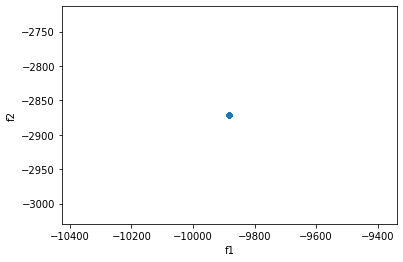

In [58]:
df_solution_sig_004.plot.scatter(x='f1', y='f2')